**Importación de bibliotecas a utilizar:**

In [1]:
import numpy as np                                        # Biblioteca de funciones matemáticas
import pandas as pd                                       # Biblioteca para manipulación de marcos de datos
from pandas.plotting import scatter_matrix                # Para generar matriz de diagramas de dispersión
import matplotlib.pyplot as plt                           # Biblioteca para salida gráfica
import geostatspy.GSLIB as GSLIB                          # Utilidades GSLIB y funciones envueltas
import geostatspy.geostats as geostats                    # GSLIB convertido a Python
import os                                                 # Para configurar el directorio de trabajo
plt.style.use('seaborn-bright')                           # Estilo visual de gráficos 

**Importación del dataset:**

In [2]:
os.chdir("C:/Users/heber/Documents/GSLIB_FOLDER") # ruta de ejecutables de GSLIB 

#A continuación se importan de forma separada los datos segun pronvicia: 
df_biskaia = pd.read_excel("C:/Users/heber/Desktop/trafico/" + "datos_2_1.xlsx", sep=";", sheet_name='biskaia')
df_gipuskoa = pd.read_excel("C:/Users/heber/Desktop/trafico/" + "datos_2_1.xlsx", sep=";", sheet_name='gipuskoa')
df_araba = pd.read_excel("C:/Users/heber/Desktop/trafico/" + "datos_2_1.xlsx", sep=";", sheet_name='araba')

df_biskaia["X"] = df_biskaia["X"]/10000 #división del eje x en 10,000 para disminuir el numero de digitos del número. 
df_biskaia["Y"] = df_biskaia["Y"]/10000 #división del eje y en 10,000 para disminuir el numero de digitos del número. 
df_gipuskoa["X"] = df_gipuskoa["X"]/10000
df_gipuskoa["Y"] = df_gipuskoa["Y"]/10000
df_araba["X"] = df_araba["X"]/10000
df_araba["Y"] = df_araba["Y"]/10000

df = pd.concat([df_biskaia,df_gipuskoa, df_araba],ignore_index = True) #concatenación de marcos de datos por provincia.
df["ID"] = range(0,len(df["X"]))
df.head() #visualización del marco de datos completo importado

,X,Y,Intensidad media diaria,Pesados número,Nº railes,Velocidad (Km/h),province,ID
0,50.83057,478.89056,33784,1925.7,2,80,Biskaia,0
1,50.81487,478.89244,21428,707.1,2,70,Biskaia,1
2,50.78995,478.85040,22286,1002.9,2,50,Biskaia,2
3,50.74363,478.89187,22170,953.3,2,50,Biskaia,3
4,50.76978,478.79938,10184,336.1,1,40,Biskaia,4


**Asignación de variables a utilizar:**

In [3]:
x1 = df_biskaia["X"] #Variable de posición en eje X sistema ETRS89
y1 = df_biskaia["Y"] #Variable de posición en eje Y sistema ETRS89
x2 = df_gipuskoa["X"] #Variable de posición en eje X sistema ETRS89
y2 = df_gipuskoa["Y"] #Variable de posición en eje Y sistema ETRS89
x3 = df_araba["X"] #Variable de posición en eje X sistema ETRS89
y3 = df_araba["Y"] #Variable de posición en eje Y sistema ETRS89

imd_1 = df_biskaia["Intensidad media diaria"][np.isfinite(df_biskaia["Intensidad media diaria"])] #Variable de interés 1
pesados_1 =df_biskaia["Pesados número"][np.isfinite(df_biskaia["Pesados número"])] #Variable de interés 2
railes_1 = df_biskaia["Nº railes"][np.isfinite(df_biskaia["Nº railes"])] #Variable de interés 3 (Esta variable es categorica)
vm_1 = df_biskaia["Velocidad (Km/h)"][np.isfinite(df_biskaia["Velocidad (Km/h)"])] #Variable de interés 4

imd_2 = df_gipuskoa["Intensidad media diaria"][np.isfinite(df_gipuskoa["Intensidad media diaria"])] #Variable de interés 1
pesados_2 =df_gipuskoa["Pesados número"][np.isfinite(df_gipuskoa["Pesados número"])] #Variable de interés 2
railes_2 = df_gipuskoa["Nº railes"][np.isfinite(df_gipuskoa["Nº railes"])] #Variable de interés 3 (Esta variable es categorica)
vm_2 = df_gipuskoa["Velocidad (Km/h)"][np.isfinite(df_gipuskoa["Velocidad (Km/h)"])] #Variable de interés 4

imd_3 = df_araba["Intensidad media diaria"][np.isfinite(df_araba["Intensidad media diaria"])] #Variable de interés 1
pesados_3 =df_araba["Pesados número"][np.isfinite(df_araba["Pesados número"])] #Variable de interés 2
railes_3 = df_araba["Nº railes"][np.isfinite(df_araba["Nº railes"])] #Variable de interés 3 (Esta variable es categorica)
vm_3 = df_araba["Velocidad (Km/h)"][np.isfinite(df_araba["Velocidad (Km/h)"])] #Variable de interés 4

imd = df["Intensidad media diaria"][np.isfinite(df["Intensidad media diaria"])] #Variable de interés 1
pesados =df["Pesados número"][np.isfinite(df["Pesados número"])] #Variable de interés 2
railes = df["Nº railes"][np.isfinite(df["Nº railes"])] #Variable de interés 3 (Esta variable es categorica)
vm = df["Velocidad (Km/h)"][np.isfinite(df["Velocidad (Km/h)"])] #Variable de interés 4

**Estadísticos básicos del marco de datos para Biskaia:**

In [4]:
df_biskaia.describe().transpose() #estadísticos básicos del marco de datos para Biskaia

,count,mean,std,min,25%,50%,75%,max
X,1075.0,52.059540,2.330078,46.415680,50.363685,51.842258,53.449313,60.266842
Y,1075.0,476.922158,2.605832,470.456568,474.723680,477.581740,479.208313,480.946700
Intensidad media diaria,1075.0,9014.225116,17420.571650,18.000000,367.500000,1881.000000,9863.000000,141110.000000
Pesados número,1075.0,840.506047,1762.526101,1.000000,19.050000,129.800000,650.550000,11077.500000
Nº railes,1075.0,1.274419,0.614873,1.000000,1.000000,1.000000,1.000000,4.000000
Velocidad (Km/h),1075.0,60.572093,21.089354,30.000000,50.000000,55.000000,70.000000,120.000000


**Estadísticos básicos del marco de datos para Gipuskoa:**

In [5]:
df_gipuskoa.describe().transpose() #estadísticos básicos del marco de datos para Gipuskoa

,count,mean,std,min,25%,50%,75%,max
X,81.0,56.934584,1.921703,53.430315,55.123288,57.161383,58.33977,60.266842
Y,81.0,478.369762,1.211348,475.753705,477.157872,478.529263,479.32974,480.081850
Intensidad media diaria,81.0,21341.098765,15911.580139,136.000000,9584.000000,17243.000000,33838.00000,69718.000000
Pesados número,81.0,2930.530864,2882.655638,10.000000,628.000000,1892.000000,4840.00000,10494.000000
Nº railes,81.0,1.679012,0.686061,1.000000,1.000000,2.000000,2.00000,4.000000
Velocidad (Km/h),81.0,78.395062,26.002730,30.000000,50.000000,80.000000,100.00000,120.000000


**Estadísticos básicos del marco de datos para Araba:**

In [6]:
df_araba.describe().transpose() #estadísticos básicos del marco de datos para Araba

,count,mean,std,min,25%,50%,75%,max
X,477.0,52.207612,1.893006,48.387477,50.698124,52.314330,53.630129,56.187565
Y,477.0,474.433577,1.692079,470.456568,473.562676,474.592567,475.491339,477.895799
Intensidad media diaria,477.0,2824.865828,6671.232061,18.000000,149.000000,424.000000,1765.000000,44416.000000
Pesados número,477.0,436.091195,1525.581540,1.000000,6.000000,20.100000,96.300000,11077.500000
Nº railes,477.0,1.090147,0.314642,1.000000,1.000000,1.000000,1.000000,3.000000
Velocidad (Km/h),477.0,61.111111,20.346841,30.000000,50.000000,60.000000,70.000000,120.000000


**Matriz de correlación entre variables de interés:** Para todo el País Vasco

In [7]:
df["IMD_N"] = (df["Intensidad media diaria"] - df["Intensidad media diaria"].min()) / (df["Intensidad media diaria"].max() - df["Intensidad media diaria"].min()) #normalización
df["Pesados_N"] = (df["Pesados número"] - df["Pesados número"].min()) / (df["Pesados número"].max() - df["Pesados número"].min()) #normalización
df["Railes_N"] = (df["Nº railes"] - df["Nº railes"].min()) / (df["Nº railes"].max() - df["Nº railes"].min()) #normalización
df["Velocidad_N"] = (df["Velocidad (Km/h)"] - df["Velocidad (Km/h)"].min()) / (df["Velocidad (Km/h)"].max() - df["Velocidad (Km/h)"].min()) #normalización
df.head() #las lineas anteriores agregan una columna al marco de datos con las variables de interés normalizados.

,X,Y,Intensidad media diaria,Pesados número,Nº railes,Velocidad (Km/h),province,ID,IMD_N,Pesados_N,Railes_N,Velocidad_N
0,50.83057,478.89056,33784,1925.7,2,80,Biskaia,0,0.239319,0.173764,0.333333,0.555556
1,50.81487,478.89244,21428,707.1,2,70,Biskaia,1,0.151745,0.063748,0.333333,0.444444
2,50.78995,478.85040,22286,1002.9,2,50,Biskaia,2,0.157826,0.090453,0.333333,0.222222
3,50.74363,478.89187,22170,953.3,2,50,Biskaia,3,0.157004,0.085975,0.333333,0.222222
4,50.76978,478.79938,10184,336.1,1,40,Biskaia,4,0.072052,0.030253,0.000000,0.111111


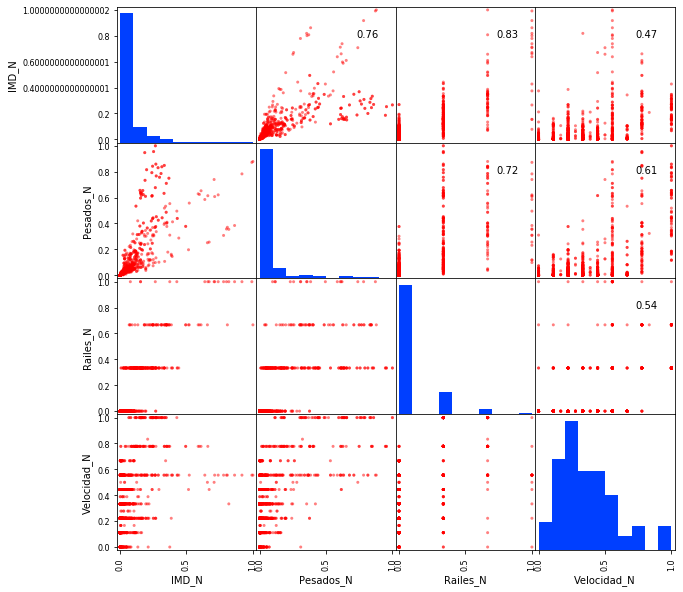

In [8]:
sub_dataset = ["IMD_N", "Pesados_N", "Railes_N", "Velocidad_N"] #Lista variables de interés normalizadas
df_sub = df[sub_dataset] #nuevo dataframe con variables de interés 

axes = scatter_matrix(df_sub, figsize=(10,10), color="red") #Matriz de diagramas de dispersión

corr = np.array(df_sub.corr()) #Coeficiente de correlación lineal
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)): 
    axes[i, j].annotate("%.2f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

**NOTA IMPORTANTE:** De los histogramas anteriores, se puede apreciar que los "railes" corresponde a una variable del tipo categorica, por ende una estimación del tipo kriging no puede ser aplicado sobre la misma. Luego "IMD" y "Pesados" poseen una asimetria positiva y dispersión muy alta. 

Varianza IMD:  242411601.6385137
Varianza Pesados:  3394910.778989694


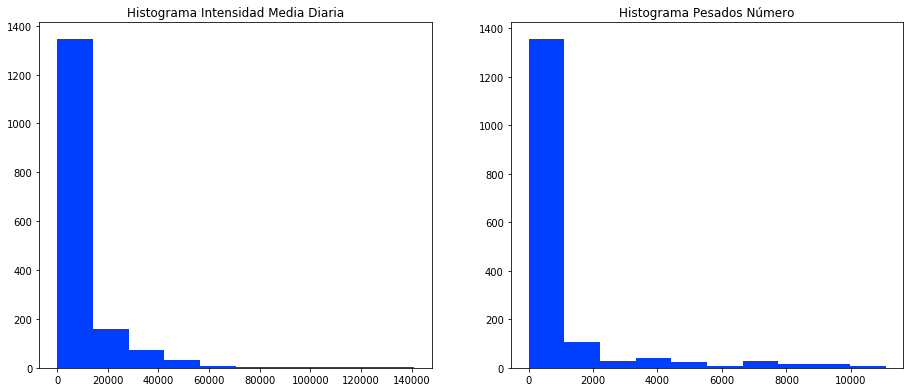

In [9]:
#Los siguientes histograman detallen de mejor la asimetría y dispersión. 

plt.subplot(121)
plt.hist(df["Intensidad media diaria"])
plt.title("Histograma Intensidad Media Diaria")
print("Varianza IMD: ", df["Intensidad media diaria"].var())
plt.subplot(122)
plt.hist(df["Pesados número"])
plt.title("Histograma Pesados Número")
print("Varianza Pesados: ", df["Pesados número"].var())
plt.subplots_adjust(left=0, bottom=0, right=2, top=1.2)
plt.show()

**Diagrama de cajas y bigotes:** Para el País Vasco en general. Estos reflejan la gran cantidad de valores atipicos para las variables que IMD y pesados.

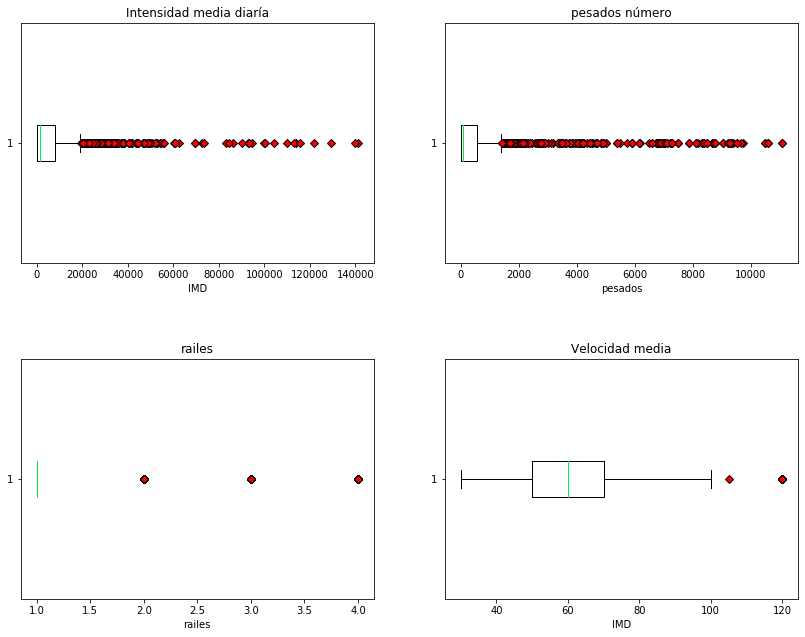

In [10]:
plt.subplot(221)
diamantes = dict(markerfacecolor='r', marker='D') 
plt.boxplot(imd, vert=False, flierprops=diamantes, showfliers=True)
plt.xlabel("IMD")
plt.title("Intensidad media diaría")
plt.subplot(222)
plt.boxplot(pesados, vert=False, flierprops=diamantes, showfliers=True)
plt.xlabel("pesados")
plt.title("pesados número")
plt.subplot(223)
plt.boxplot(railes, vert=False, flierprops=diamantes, showfliers=True)
plt.xlabel("railes")
plt.title("railes")
plt.subplot(224)
plt.boxplot(vm, vert=False, flierprops=diamantes, showfliers=True)
plt.xlabel("IMD")
plt.title("Velocidad media")
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.8, top=2, wspace=0.2, hspace=0.4)
plt.show()

**Disposición espacial de las variables de interés:**

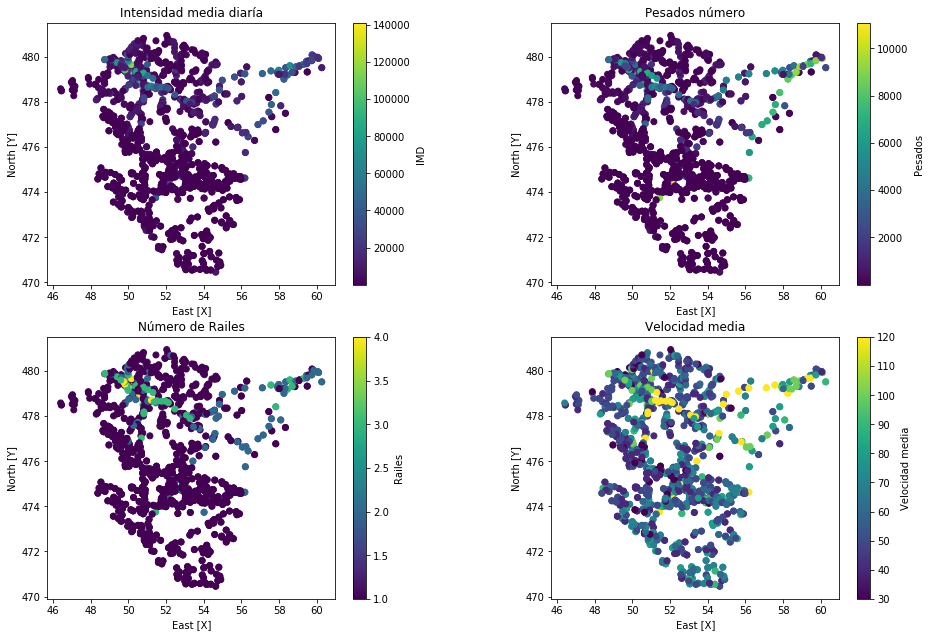

Los 3 primeros gráficos reflejan la alta concentración en valores bajos de las variables


In [11]:
plt.subplot(221) #Salida de 4 gráficos en una fígura 
plt.scatter(df["X"], df["Y"], c=df["Intensidad media diaria"], cmap = plt.cm.viridis)
plt.ylabel('North [Y]')
plt.xlabel('East [X]')
plt.title("Intensidad media diaría")
cbar=plt.colorbar()
cbar.set_label('IMD', labelpad=+5)
plt.subplot(222)
plt.scatter(df["X"], df["Y"], c=df["Pesados número"], cmap = plt.cm.viridis)
plt.ylabel('North [Y]')
plt.xlabel('East [X]')
plt.title("Pesados número")
cbar=plt.colorbar()
cbar.set_label('Pesados', labelpad=+5)
plt.subplot(223)
plt.scatter(df["X"], df["Y"], c=df["Nº railes"], cmap = plt.cm.viridis)
plt.ylabel('North [Y]')
plt.xlabel('East [X]')
plt.title("Número de Railes")
cbar=plt.colorbar()
cbar.set_label('Railes', labelpad=+5)
plt.subplot(224)
plt.scatter(df["X"], df["Y"], c=df["Velocidad (Km/h)"], cmap = plt.cm.viridis)
plt.ylabel('North [Y]')
plt.xlabel('East [X]')
plt.title("Velocidad media")
cbar=plt.colorbar()
cbar.set_label('Velocidad media', labelpad=+5)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2, top=2, wspace=0.4, hspace=0.2)
plt.show()
print("Los 3 primeros gráficos reflejan la alta concentración en valores bajos de las variables")

**Agrupamiento mediante Clustering Jerarquico Aglomerativo:**

El agrupamaiento se propone para disminuir la dispersión en la variable. Al generar grupos se busca un comportamiento mas homogeneo. 

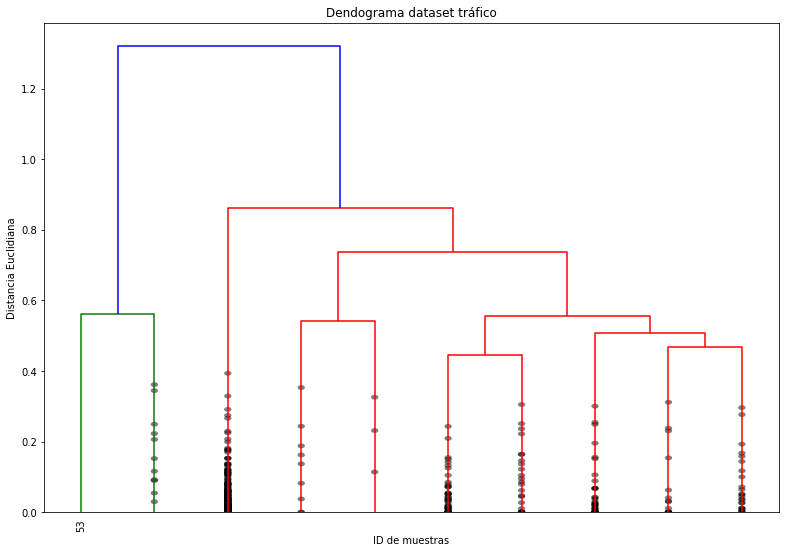

In [12]:
from scipy.cluster.hierarchy import dendrogram, linkage 
Z = linkage(df[sub_dataset], method="average", metric="euclidean") #Clustering Jerarquico Aglomerativo (machine learning)

plt.subplot(111) #Visualización del Dendograma con las opciones de cluster
dendrogram(Z, leaf_rotation=90, leaf_font_size=10, truncate_mode="lastp", p=10, show_leaf_counts=False, show_contracted=True)
plt.ylabel("Distancia Euclidiana")
plt.xlabel("ID de muestras")
plt.title("Dendograma dataset tráfico")
plt.subplots_adjust(left=0, bottom=0, right=1.7, top=1.7)
plt.show()

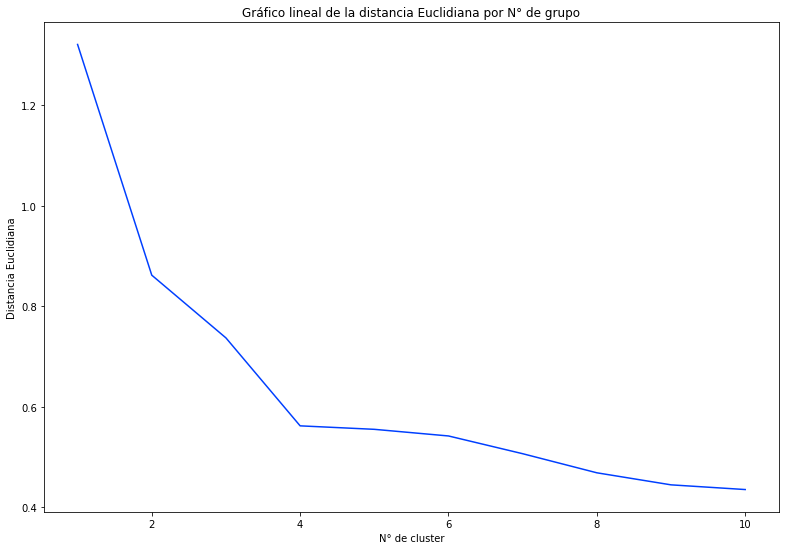

In [13]:
#Método del codo para seleccionar el numero de clusters:

plt.subplot(111)

distancias = Z[-10:, 2]
distancias_invertidas = distancias[::-1]

clusters_num = np.arange(1,len(distancias_invertidas) + 1)

plt.plot(clusters_num, distancias_invertidas)
plt.title("Gráfico lineal de la distancia Euclidiana por N° de grupo")
plt.xlabel("N° de cluster")
plt.ylabel("Distancia Euclidiana")
plt.subplots_adjust(left=0, bottom=0, right=1.7, top=1.7)
plt.show()

In [14]:
from scipy.cluster.hierarchy import fcluster #agrupamiento jerarquico (finalmente se descarta y se usa otro método)

max_d = 0.9 #criterio por distancia

k =2 #criterio por número de cluster

cluster = fcluster(Z, k, criterion="maxclust") #Agrupamiento del DF por Clusters.
df_cluster = pd.DataFrame(cluster, columns=["Clusters"])
df["clusters"] = df_cluster["Clusters"]
df.head()

,X,Y,Intensidad media diaria,Pesados número,Nº railes,Velocidad (Km/h),province,ID,IMD_N,Pesados_N,Railes_N,Velocidad_N,clusters
0,50.83057,478.89056,33784,1925.7,2,80,Biskaia,0,0.239319,0.173764,0.333333,0.555556,2
1,50.81487,478.89244,21428,707.1,2,70,Biskaia,1,0.151745,0.063748,0.333333,0.444444,2
2,50.78995,478.85040,22286,1002.9,2,50,Biskaia,2,0.157826,0.090453,0.333333,0.222222,2
3,50.74363,478.89187,22170,953.3,2,50,Biskaia,3,0.157004,0.085975,0.333333,0.222222,2
4,50.76978,478.79938,10184,336.1,1,40,Biskaia,4,0.072052,0.030253,0.000000,0.111111,2


**Visualización de los datos por cluster jerarquico:**

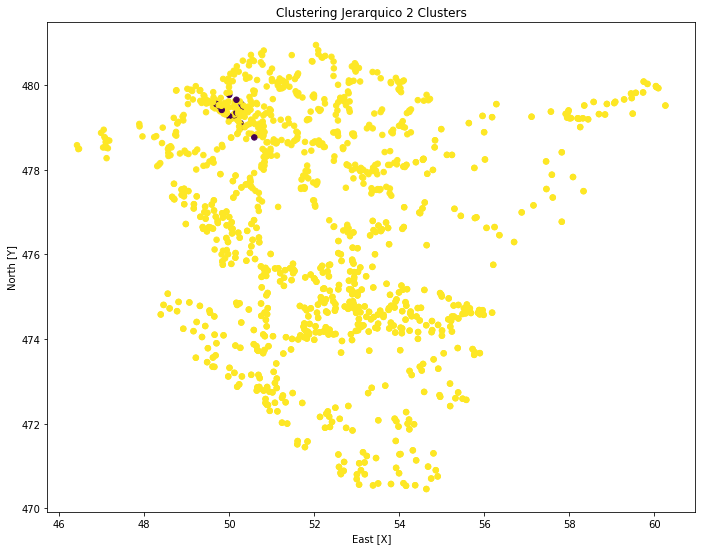

In [15]:
plt.scatter(df["X"], df["Y"], c=df["clusters"], s= 30, cmap = plt.cm.viridis) 
plt.ylabel('North [Y]')
plt.xlabel('East [X]')
plt.title("Clustering Jerarquico 2 Clusters")
plt.subplots_adjust(left=0, bottom=0.0, right=1.5, top=1.7, wspace=0.2)
plt.show()

In [16]:
print("Cluster 1 equivalente al: ", round(df["X"][df["clusters"]==1].count()*100/df["X"].count(),2), "del total")
print("Cluster 2 equivalente al: ", round(df["X"][df["clusters"]==2].count()*100/df["X"].count(),2), "del total")

Cluster 1 equivalente al:  0.86 del total
Cluster 2 equivalente al:  99.14 del total


**Agrupamiento de datos mediante K-Means (Machine Learning):** Segunda alternativa de agrupamiento (y seleccionada)

In [17]:
from sklearn.cluster import KMeans
model =KMeans(n_clusters=2, verbose=0)
model.fit(df[sub_dataset])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [18]:
clusters_2 = pd.Series(model.labels_)
df["clusters_kmeans"] = clusters_2
df.head()

,X,Y,Intensidad media diaria,Pesados número,Nº railes,Velocidad (Km/h),province,ID,IMD_N,Pesados_N,Railes_N,Velocidad_N,clusters,clusters_kmeans
0,50.83057,478.89056,33784,1925.7,2,80,Biskaia,0,0.239319,0.173764,0.333333,0.555556,2,0
1,50.81487,478.89244,21428,707.1,2,70,Biskaia,1,0.151745,0.063748,0.333333,0.444444,2,1
2,50.78995,478.85040,22286,1002.9,2,50,Biskaia,2,0.157826,0.090453,0.333333,0.222222,2,1
3,50.74363,478.89187,22170,953.3,2,50,Biskaia,3,0.157004,0.085975,0.333333,0.222222,2,1
4,50.76978,478.79938,10184,336.1,1,40,Biskaia,4,0.072052,0.030253,0.000000,0.111111,2,1


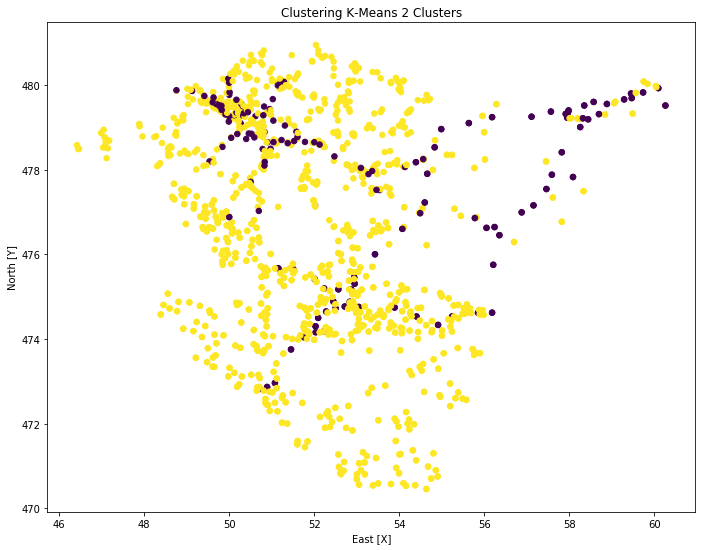

In [19]:
plt.scatter(df["X"], df["Y"], c=df["clusters_kmeans"], s= 30, cmap = plt.cm.viridis) 
plt.ylabel('North [Y]')
plt.xlabel('East [X]')
plt.title("Clustering K-Means 2 Clusters")
plt.subplots_adjust(left=0, bottom=0.0, right=1.5, top=1.7, wspace=0.2)
plt.show()

In [20]:
print("Cluster 1 equivalente al: ", round(df["X"][df["clusters_kmeans"]==0].count()*100/df["X"].count(),2), "del total")
print("Cluster 2 equivalente al: ", round(df["X"][df["clusters_kmeans"]==1].count()*100/df["X"].count(),2), "del total")

Cluster 1 equivalente al:  13.41 del total
Cluster 2 equivalente al:  86.59 del total


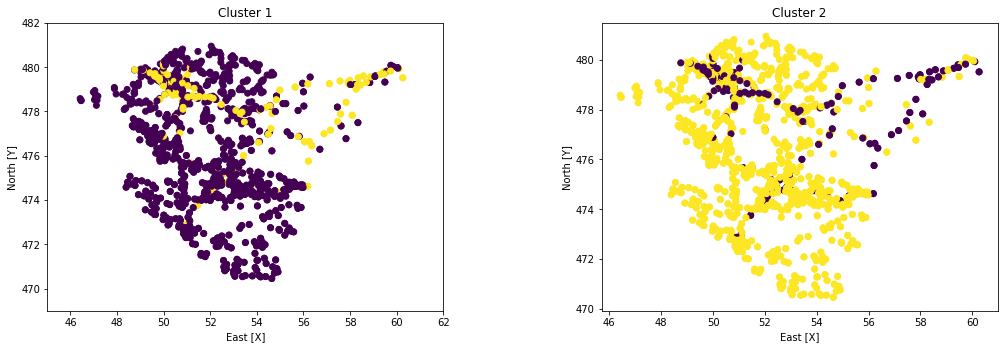

En color amarillo se identifica el cluster. El cluster 2 corresponde a los mayores valores de las 4 variables en estudio


In [21]:
plt.subplot(121) #Salida de 2 gráficos con los respectivos cluster
plt.scatter(df["X"], df["Y"], c=df["clusters_kmeans"]==0)
plt.ylabel('North [Y]')
plt.xlabel('East [X]')
plt.title("Cluster 1")
plt.xlim(45,62)
plt.ylim(469, 482)
plt.subplot(122)
plt.scatter(df["X"], df["Y"], c=df["clusters_kmeans"]==1)
plt.ylabel('North [Y]')
plt.xlabel('East [X]')
plt.title("Cluster 2")
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.2, top=1, wspace=0.4)
plt.show()
print("En color amarillo se identifica el cluster. El cluster 2 corresponde a los mayores valores de las 4 variables en estudio")

In [22]:
df.groupby("clusters_kmeans")["Intensidad media diaria", "Pesados número", "Nº railes", "Velocidad (Km/h)"].describe().transpose()

clusters_kmeans                            0             1
Intensidad media diaria count     219.000000   1414.000000
                        mean    36565.748858   3365.263791
                        std     25384.843057   5712.790751
                        min      5363.000000     18.000000
                        25%     20943.000000    208.500000
                        50%     31851.000000    808.500000
                        75%     43970.000000   3950.000000
                        max    141110.000000  54397.000000
Pesados número          count     219.000000   1414.000000
                        mean     4591.189498    242.900990
                        std      2769.860005    447.148857
                        min       333.000000      1.000000
                        25%      2070.800000     10.000000
                        50%      4084.000000     48.750000
                        75%      6890.300000    275.025000
                        max     11077.500000   4167.000000
Nº railes               count     219.000000   1414.000000
                        mean        2.410959      1.059406
                        std         0.638999      0.242378
                        min         2.000000      1.000000
                        25%         2.000000      1.000000
                        50%         2.000000      1.000000
                        75%         3.000000      1.000000
                        max         4.000000      3.000000
Velocidad (Km/h)        count     219.000000   1414.000000
                        mean       99.703196     55.714286
                        std        17.977523     14.943360
                        min        30.000000     30.000000
                        25%        80.000000     40.000000
                        50%       100.000000     50.000000
                        75%       120.000000     70.000000
                        max       120.000000    100.000000

In [23]:
df.to_csv("C:/Users/heber/Desktop/trafico/" + "datos_finales.csv") #guardando datos agrupados

#La variografía se realizará para el grupo equivalente al 87% de la muestra.

**Grilla para la estimación:**

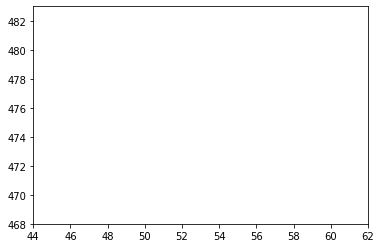

In [24]:
grid_x = np.linspace(44,62, num=180, endpoint=False) #Coord. de origen x, coord. de termino x, nª de celdas x.
grid_y = np.linspace(468,483, num=150, endpoint=False) #Coord. de origen y, coord. de termino y, nª de celdas y.

plt.xlim(44,62)
plt.ylim(468, 483)

gx = np.array(grid_x) #conversión a un array de numpy 
gy = np.array(grid_y) #conversión a un array de numpy 


yg, xg = np.meshgrid(grid_y, grid_x, indexing='ij') #Creación de la grilla (intersecciones en yg; xg)

x_g = xg.ravel() #aplanamiento de xg
y_g = yg.ravel() #aplanamiento de yg

In [25]:
d = {'Este [X]': x_g, 'Norte [Y]': y_g} #Columnas con coordenadas X e Y.
df3 = pd.DataFrame(data=d) #Creación del dataframe 
df3.head()

,Este [X],Norte [Y]
0,44.0,468.0
1,44.1,468.0
2,44.2,468.0
3,44.3,468.0
4,44.4,468.0


**Estimación con Kriging Ordinario:** Variograma omnidireccional de 15,000 metros de alcance y 30,000 metros de radio de busqueda de Kriging. La Variografía se realiza sobre el cluster mas poblado y se extiende para todo el País Vasco.

In [26]:
df2_read = pd.read_excel("C:/Users/heber/Desktop/trafico/kriging.xlsx", sep=";", header=None) #Lectura del archivo csv
df2_read.rename(columns={0: 'KO_velocidad', 1: 'VAR_velocidad'}, inplace=True) #Se renombran las columnas
df2_read.reset_index(drop=True, inplace=True) #Se resetea la numeración de las filas

df3["KO_velocidad"] = df2_read["KO_velocidad"] #Traspaso de la columna Velocidad KO al nuevo DataFrame.
df3["VAR_velocidad"] = df2_read["VAR_velocidad"] #Traspaso de la columna Varianza Velocidad al nuevo DataFrame.

#plt.savefig("C:/Users/heber/Desktop/trafico/estimacion_velocidad.png", dpi=300) #ruta imagen guardada
df3.to_csv("C:/Users/heber/Desktop/trafico/" + "kriging_velocidad.csv", index=False, sep=",") #salida del archivo .CSV
df_kriging = df3.copy()

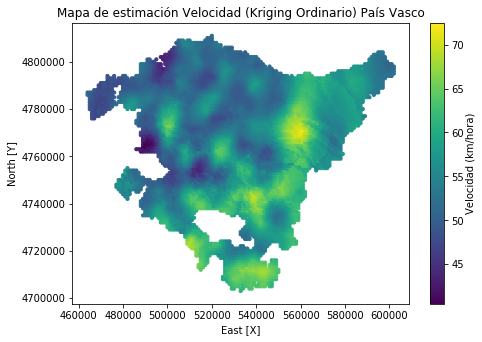

In [37]:
df_velocidad_k = pd.read_csv("C:/Users/heber/Desktop/trafico/recortado_kriging_velocidad.csv")

marker_size=10
plt.subplot(111)
plt.scatter(df_velocidad_k["X"], df_velocidad_k["Y"], marker_size, df_velocidad_k["KO_velocidad"], cmap = plt.cm.viridis)
plt.xlabel('East [X]')
plt.ylabel('North [Y]')
plt.title('Mapa de estimación Velocidad (Kriging Ordinario) País Vasco')
cbar=plt.colorbar()
#plt.clim(30,100)
cbar.set_label("Velocidad (km/hora)", labelpad=+1)
#plt.savefig("C:/Users/heber/Desktop/trafico/estimacion_velocidad.png", dpi=300) #ruta imagen guardada

plt.subplots_adjust(right=1.1, top=1.1)
plt.show()

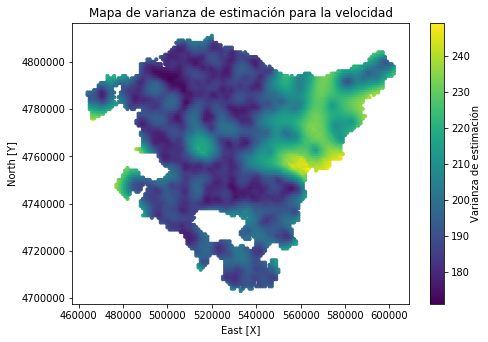

In [39]:
plt.subplot(111)
plt.scatter(df_velocidad_k["X"], df_velocidad_k["Y"], marker_size, df_velocidad_k["VAR_velocidad"], cmap = plt.cm.viridis)
plt.xlabel('East [X]')
plt.ylabel('North [Y]')
plt.title('Mapa de varianza de estimación para la velocidad')
cbar=plt.colorbar()
#plt.clim(30,100)
cbar.set_label("Varianza de estimación", labelpad=+1)
#plt.savefig("C:/Users/heber/Desktop/trafico/estimacion_velocidad.png", dpi=300) #ruta imagen guardada

plt.subplots_adjust(right=1.1, top=1.1)
plt.show()

Para las otras 3 variables, se debe estudiar que método de interpolación proponer. Al usar Kriging, para el IMD y Pesados, se deben generar subdivisiones para disminuir la varianza, aumentar la estacionariedad y hacer pruebas si es posible incorporar este método para dichas variables. 


Para con la variable categorica que son rieles, se puede proponer un método de vecinos cercanos, el cual toma directamente el valor de la observación mas cercana, sin hacer ponderaciones entre mas de 1 obseración. 